## Table of content


Part 1: (Column Names are denoted by quotation marks)  [0-40]
•	What are the top 5 games by global sales?  
•	Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  
•	What is the distribution of the most popular 4 game genres?  
•	Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  
•	What are the 3 most common “developer” in the dataset?  


Part 2   [0-10]
You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.  


Part3:   [0-50] 
You must explain, in detail,    
why you chose the specific methods to engineer the data and how you achieved this in python (Part 1/Part 2)  
why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)    
Note that all written work MUST be completed in Jupyter Notebook Markdown (please review “Jupyter Notebook Tutorial” Notes in Moodle if you are unsure of this), NOT in code comments.


Import Datset & libraries

In [3]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('vgsales.csv')

In [11]:
# check number of rows and number of features present in the dataset
num_rows, num_columns = df.shape[0], df.shape[1]
print(f"Number of rows: {num_rows}, Number of columns: {num_columns}")

Number of rows: 16719, Number of columns: 16


In [13]:
# check features names
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None


Overview

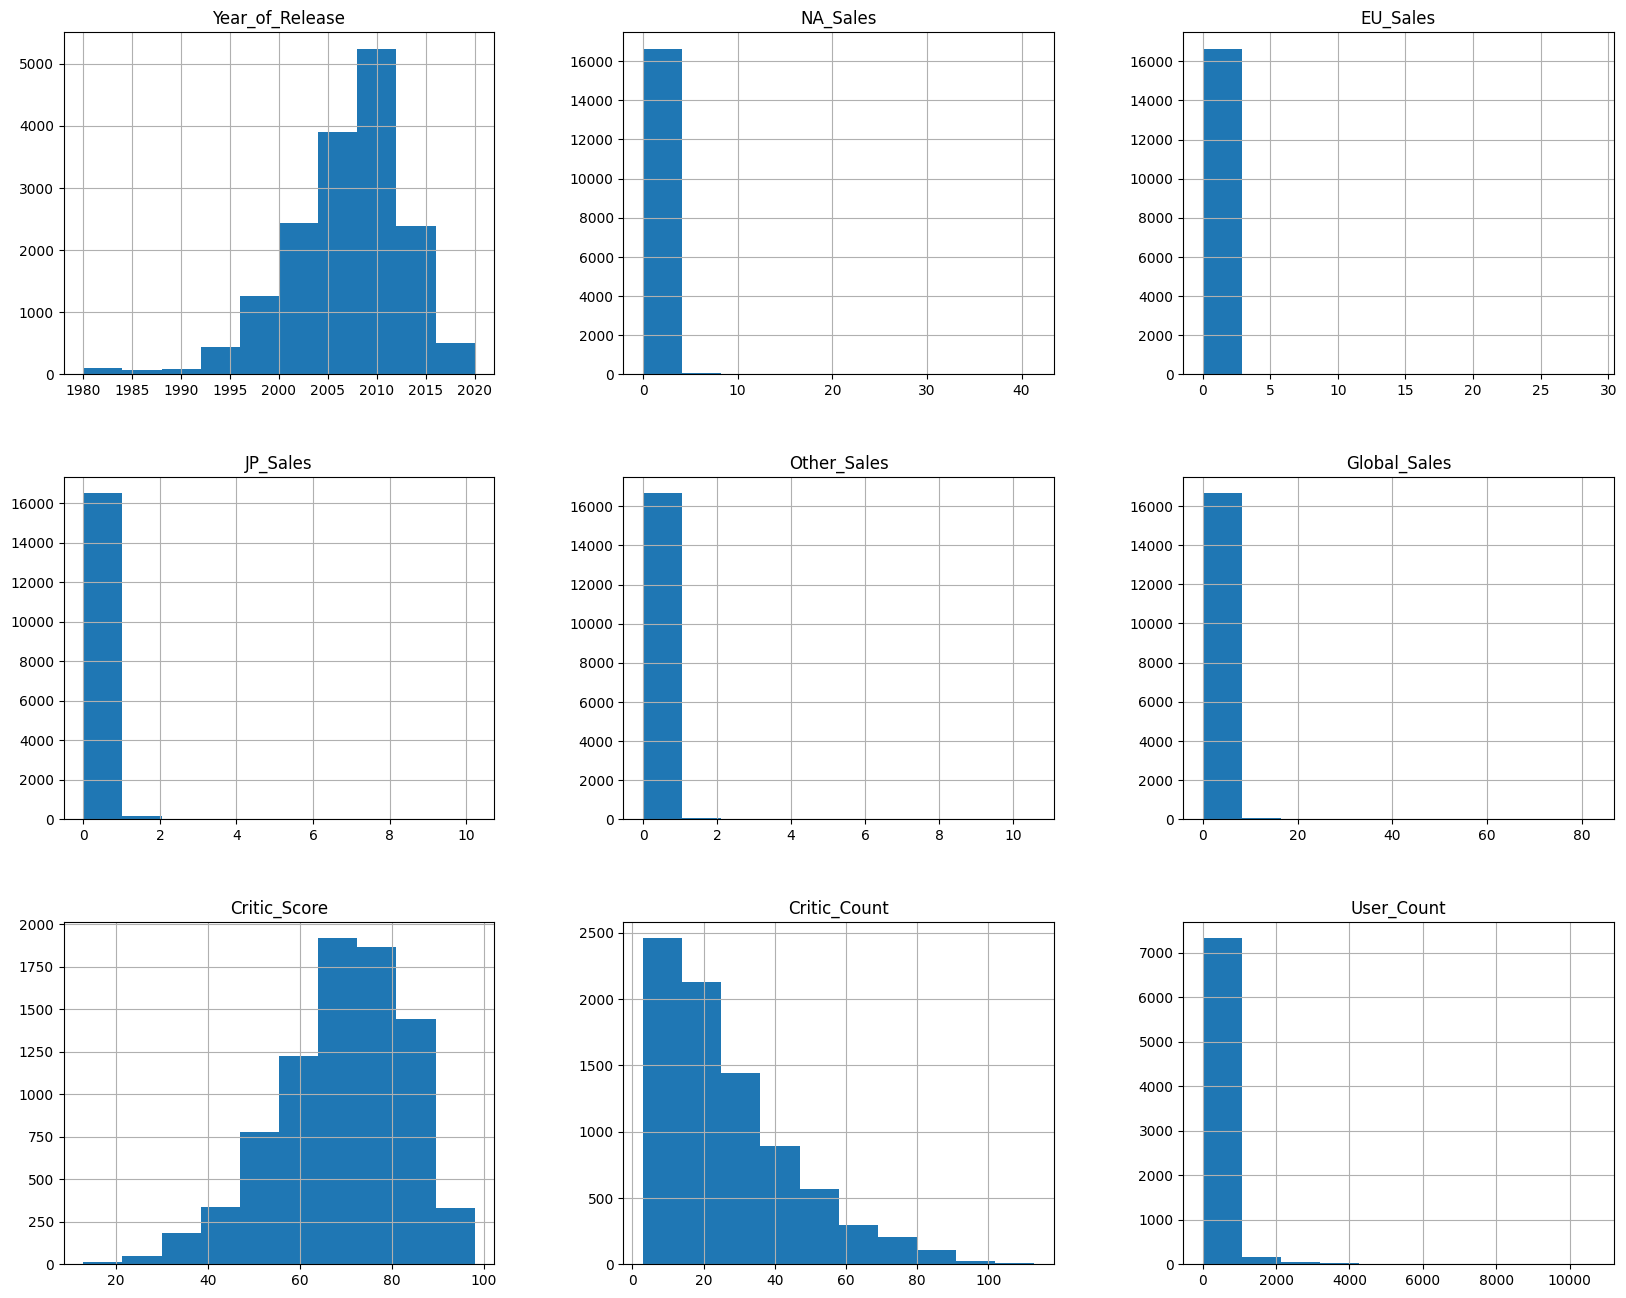

In [6]:
df.hist(figsize=(20, 16))
plt.show()

In [7]:
# from ydata_profiling import ProfileReport
# slice_df = df.iloc[:, :10]
# report = ProfileReport(df, title='My Data', minimal=True)
# report.to_file("vgsales File.html")

In [8]:
# check total number of missing values per column and relative percentage 
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [14]:
# compute the percentage of missing values per column
missing_values_perc = df.isnull().sum()/num_rows * 100
missing_values_perc

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

### 1.1) What are the top 5 games by global sales?

In [15]:
# Sort the dataframe by Global_Sales in descending order
df_sorted = df.sort_values(by='Global_Sales', ascending=False)

# Get the top 5 games
top_5_games = df_sorted.head(5)

# Print the top 5 games by Global Sales
print("Top 5 Games by Global Sales:")
print(top_5_games[['Name', 'Global_Sales']])

Top 5 Games by Global Sales:
                       Name  Global_Sales
0                Wii Sports         82.53
1         Super Mario Bros.         40.24
2            Mario Kart Wii         35.52
3         Wii Sports Resort         32.77
4  Pokemon Red/Pokemon Blue         31.37


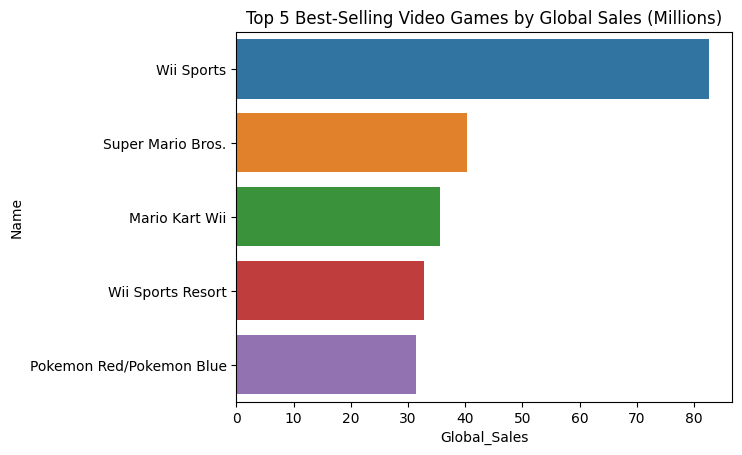

In [19]:
# Let's plot the top 5 games by Global Sales
sns.barplot(x='Global_Sales', y='Name', data=top_5_games)
plt.title("Top 5 Best-Selling Video Games by Global Sales (Millions)")
plt.show()

In [20]:
# Out of curiosity let's check the lowest 5 games by Global Sales
df_sorted = df.sort_values(by='Global_Sales', ascending=True)
bottom_5_games = df_sorted.head(5)
print("\nBottom 5 Games by Global Sales:")
print(bottom_5_games[['Name', 'Global_Sales']])


Bottom 5 Games by Global Sales:
                                                    Name  Global_Sales
16718                                Winning Post 8 2016          0.01
16296             AKB1/48: Idol to Guam de Koishitara...          0.01
16295                                             Casper          0.01
16294  Simple 2000 Series Vol. 120: The Saigo no Nipp...          0.01
16293                 Rave Master: Special Attack Force!          0.01


Can be interesting to compute for the top5 most sold games to compute how much sales percentage they account in the total sales of the 5 top sold games. We can use a piue chart to visualize this.

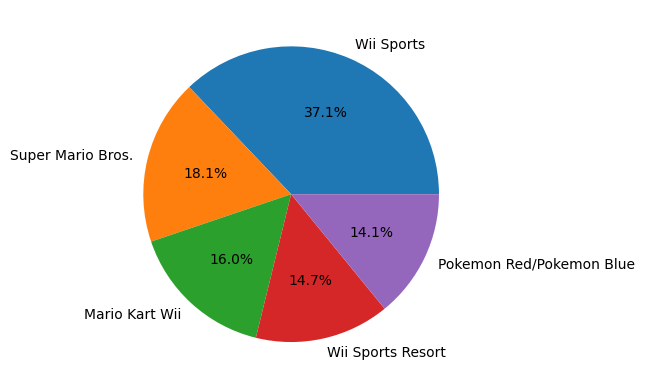

In [21]:
top5_sales = top_5_games['Global_Sales']
top5_sales_perc = top5_sales / top_5_games['Global_Sales'].sum() * 100
plt.pie(top5_sales_perc, labels=top_5_games['Name'].values, autopct='%1.1f%%');